# Standard 2-D case study

<!-- SUMMARY: Standard workflow on a 2-D data set. Performs variography and modeling, estimation and simulation, in a monovariate and bivariate cases.  -->

<!-- CATEGORY: Case_Studies -->

## Import packages

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import gstlearn as gl
import gstlearn.plot as gp
import gstlearn.document as gdoc

Global variables

In [2]:
verbose  = True
graphics = True
gl.OptCst.define(gl.ECst.NTCOL,6)
gdoc.setNoScroll()

<IPython.core.display.Javascript object>

## Reading data

The data are stored in a CSV format in the file called Pollution.dat 

In [3]:
filepath = gdoc.loadData("Pollution", "Pollution.dat")
mydb = gl.Db.createFromCSV(filepath,gl.CSVformat())
mydb.setLocators(["X","Y"],gl.ELoc.X)
mydb.setLocator("Zn",gl.ELoc.Z)
if verbose:
    dbfmt = gl.DbStringFormat()
    dbfmt.setFlags(flag_resume=True, flag_vars=True, flag_extend=True) 
    mydb.display(dbfmt)


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 5
Total number of samples      = 102

Data Base Extension
-------------------
Coor #1 - Min =    109.850 - Max =    143.010 - Ext = 33.16
Coor #2 - Min =    483.660 - Max =    513.040 - Ext = 29.38

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = X - Locator = x1
Column = 2 - Name = Y - Locator = x2
Column = 3 - Name = Zn - Locator = z1
Column = 4 - Name = Pb - Locator = p1


Accessing to the variable names

In [4]:
print("List of all variable names =",mydb.getAllNames())

List of all variable names = ('rank', 'X', 'Y', 'Zn', 'Pb')


Extracting the vector containing the Zn variable in order to perform a selection

In [5]:
tabZn = mydb.getColumn('Zn') # equivalent to mydb["Zn"] or mydb[3]
selZn = tabZn < 20
mydb.addSelection(selZn,'sel')
mydb.setLocator('Pb',gl.ELoc.Z)
dbfmt = gl.DbStringFormat.createFromFlags(flag_stats=True)
if verbose:
    mydb.display(dbfmt)


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 6
Total number of samples      = 102
Number of active samples     = 99

Data Base Statistics
--------------------
1 - Name rank - Locator NA
 Nb of data          =        102
 Nb of active values =         99
 Minimum value       =      1.000
 Maximum value       =    102.000
 Mean value          =     51.808
 Standard Deviation  =     29.114
 Variance            =    847.650
2 - Name X - Locator x1
 Nb of data          =        102
 Nb of active values =         99
 Minimum value       =    109.850
 Maximum value       =    143.010
 Mean value          =    119.924
 Standard Deviation  =      6.549
 Variance            =     42.890
3 - Name Y - Locator x2
 Nb of data          =        102
 Nb of active values =         99
 Minimum value       =    483.660
 Maximum value       =    513.040
 Mean value          =   

Display my Data (with samples represented by color and size)

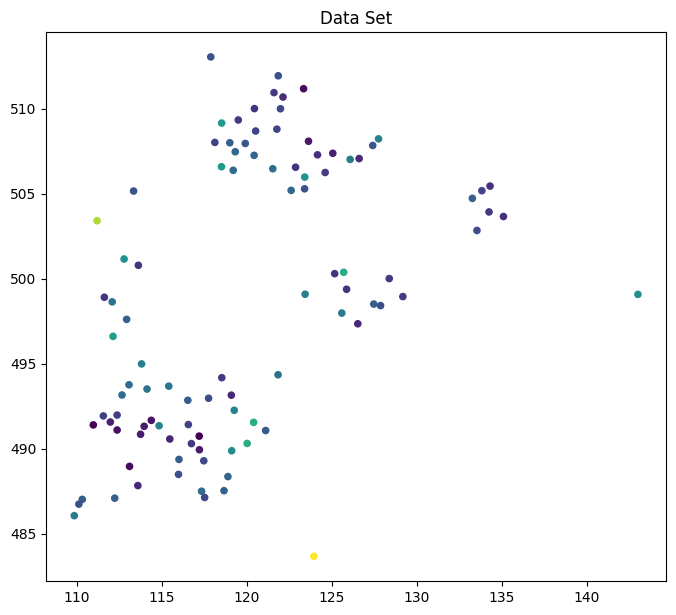

In [6]:
if graphics:
    ax = mydb.plot(nameColor="Pb")
    ax.decoration(title="Data Set")

## Variograms

We first define the geometry of the variogram calculations

In [7]:
myVarioParamOmni = gl.VarioParam()
mydir = gl.DirParam.create(npas=10, dpas=1.)
myVarioParamOmni.addDir(mydir)

We use the variogram definition in order to calculate the variogram cloud.

In [8]:
dbcloud = gl.db_vcloud(mydb, myVarioParamOmni)

We recall that the Variogram cloud is calculated by filling an underlying grid where each cell is painted according to the number of pairs at the given distance and given variability. Representing the variogram cloud

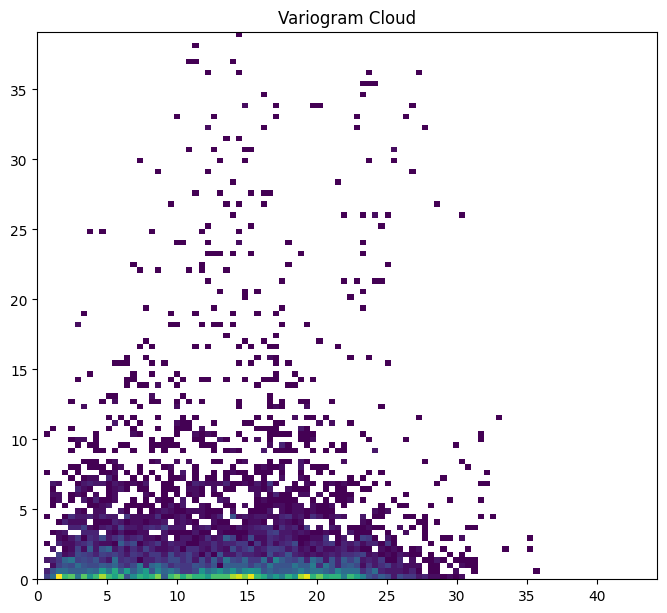

In [9]:
if graphics:
    ax = dbcloud.plot("Cloud*")
    ax.decoration(title="Variogram Cloud")

Calculating the experimental omni-directional variogram

In [10]:
myVarioOmni = gl.Vario(myVarioParamOmni)
err = myVarioOmni.compute(mydb, gl.ECalcVario.VARIOGRAM)
if verbose:
    myVarioOmni.display()


Variogram characteristics
Number of variable(s)       = 1
Number of direction(s)      = 1
Space dimension             = 2
Variable(s)                 = [Pb]

Variance-Covariance Matrix     2.881

Direction #1
------------
Number of lags              = 10
Direction coefficients      =      1.000     0.000
Direction angles (degrees)  =      0.000
Tolerance on direction      =     90.000 (degrees)
Calculation lag             =      1.000
Tolerance on distance       =     50.000 (Percent of the lag value)

For variable 1
      Rank    Npairs  Distance     Value
         0     3.000     0.389     0.462
         1   123.000     1.081     1.495
         2   183.000     2.038     1.620
         3   205.000     3.006     2.526
         4   231.000     4.013     2.240
         5   229.000     5.036     2.524
         6   198.000     5.962     2.396
         7   187.000     7.000     2.708
         8   204.000     7.996     2.772
         9   184.000     8.990     2.868


The variogram is represented graphically for a quick check

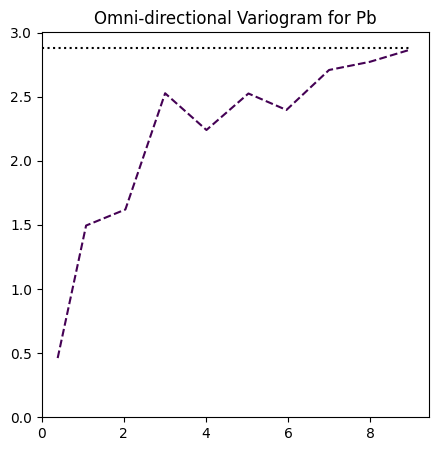

In [11]:
if graphics:
    ax = myVarioOmni.plot()
    ax.decoration(title="Omni-directional Variogram for Pb")

Calculate a variogram in several directions

In [12]:
myvarioParam = gl.VarioParam()
mydirs = gl.DirParam.createMultiple(4, 10, 1.)
myvarioParam.addMultiDirs(mydirs)
myvario = gl.Vario(myvarioParam)
myvario.compute(mydb,gl.ECalcVario.VARIOGRAM)
if verbose:
    myvario.display()


Variogram characteristics
Number of variable(s)       = 1
Number of direction(s)      = 4
Space dimension             = 2
Variable(s)                 = [Pb]

Variance-Covariance Matrix     2.881

Direction #1
------------
Number of lags              = 10
Direction coefficients      =      1.000     0.000
Direction angles (degrees)  =      0.000
Tolerance on direction      =     22.500 (degrees)
Calculation lag             =      1.000
Tolerance on distance       =     50.000 (Percent of the lag value)

For variable 1
      Rank    Npairs  Distance     Value
         0     1.000     0.410     0.180
         1    29.000     1.094     1.634
         2    47.000     2.079     1.415
         3    53.000     3.003     2.824
         4    63.000     3.999     2.348
         5    66.000     5.035     2.319
         6    60.000     5.978     3.115
         7    52.000     7.045     2.746
         8    52.000     8.020     3.927
         9    37.000     8.980     2.554

Direction #2
-----------

In [ ]:
if graphics:
    ax = myvario.plot(idir=-1)
    ax.decoration(title="Multi-Directional Variogram of Pb")

Calculating the Variogram Map

In [ ]:
myvmap = gl.db_vmap(mydb,gl.ECalcVario.VARIOGRAM,[20,20])
if verbose:
    myvmap.display()

In [ ]:
if graphics:
    ax = myvmap.plot(nameRaster="*Var")
    ax.decoration(title="Variogram Map")

## Model

Fitting a Model. We call the Automatic Fitting procedure providing the list of covariance functions to be tested.

In [ ]:
mymodel = gl.Model.createFromDb(mydb)
err = mymodel.fit(myvario,[gl.ECov.EXPONENTIAL,gl.ECov.SPHERICAL])

Visualizing the resulting model, overlaid on the experimental variogram

In [ ]:
if graphics:
    ax = gp.varmod(myvario,mymodel)
    ax.decoration(title="Model for Pb")

### Model with equality constraints 

We can impose some constraints on the parameters during the fit. For instance here, we impose an equality constraint on the range (range = 1).

In [ ]:
myModelConstrained = gl.Model.createFromDb(mydb)
constr = gl.Constraints()
paramid = gl.CovParamId(0,0,gl.EConsElem.RANGE,0,0)
constr.addItem(gl.ConsItem(paramid,gl.EConsType.EQUAL,1.))
err = myModelConstrained.fit(myVarioOmni,[gl.ECov.SPHERICAL],constr)
if (err > 0): print("Error while fitting the model")
myModelConstrained

We can impose inequality constraints by using **EConsType.LOWER** or **EConsType.UPPER**.

## Adding a drift

In [ ]:
mymodel.setDriftIRF()
if verbose:
    mymodel.display()

## Defining the Neighborhood

We initiate a Neigborhood (Moving with a small number of samples for Demonstration)

In [ ]:
myneigh = gl.NeighMoving.create(flag_xvalid=False,nmaxi=6,radius=10)
if verbose:
    myneigh.display()

## Checking the Moving Neighborhood

We must first create a Grid which covers the area of interest

In [ ]:
mygrid = gl.DbGrid.createCoveringDb(mydb,[],[0.5,0.5],[],[2,2])
if verbose:
    mygrid.display()

We can now test the neighborhood characteristics for each node of the previously defined grid.

In [ ]:
err = gl.test_neigh(mydb,mygrid,mymodel,myneigh)
if (err > 0): print("Error while running test_neigh")
if verbose:
    mygrid.display()

We can visualize some of the newly created variables, such as:


- the number of points per neighborhood

In [ ]:
if graphics:
    ax = mygrid.plot(nameRaster="Neigh*Number")
    ax.decoration(title="Number of Samples per Neighborhood")

- the one giving the maximum distance per neighborhood

In [ ]:
if graphics:
    ax=mygrid.plot(nameRaster="Neigh*MaxDist")
    ax.decoration(title="Maximum Distance per Neighborhood")

## Cross-validation

We can now process the cross-validation step

In [ ]:
err = gl.xvalid(mydb,mymodel,myneigh)
if (err > 0): print("Error while running xvalid")
if verbose:
    mydb.display()

In [ ]:
if graphics:
    gp.histogram(mydb,name="Xvalid.Pb.stderr",bins=50,range=(-4,3))

## Estimation by Kriging

We now perform the Estimation by Ordinary Kriging. The Neighborhood is changed into a Unique Neighborhood.

In [ ]:
mydb.setLocator("Pb",gl.ELoc.Z)
myneigh = gl.NeighUnique.create()
err = gl.kriging(mydb,mygrid,mymodel,myneigh)
if (err > 0): print("Error while running kriging")
if verbose:
    mygrid.display(dbfmt)

Visualizing the results

In [ ]:
if graphics:
    ax = mygrid.plot(nameRaster="Kriging.Pb.estim")
    ax = mydb.plot(nameColor="Pb")
    ax.decoration(title="Estimate of Pb")

In [ ]:
if graphics:
    ax = mygrid.plot(nameRaster="Kriging.Pb.stdev")
    ax = mydb.plot(nameColor="Pb")
    ax.decoration(title="St. Deviation of Pb")

## Simulations

We must first transform the Data into Gaussian

In [ ]:
myanamPb = gl.AnamHermite(30)
myanamPb.fitFromLocator(mydb)
if verbose:
    myanamPb.display()

We can produce the Gaussian Anamorphosis graphically within its definition domain.

In [ ]:
if graphics:
    gp.anam(myanamPb)

The next step consists in translating the target variable ('Pb') into its Gaussian transform

In [ ]:
mydb.setLocator("Pb",gl.ELoc.Z)
err = myanamPb.rawToGaussianByLocator(mydb)
if verbose:
    mydb.display()

We quickly calculate experimental (omni-directional) variograms of the gaussian variable (locater Z) using the already defined directions

In [ ]:
myvarioParam = gl.VarioParam()
mydir = gl.DirParam(10,1.)
myvarioParam.addDir(mydir)
myVario = gl.Vario(myvarioParam)
err = myvario.compute(mydb,gl.ECalcVario.VARIOGRAM)

We fit the model by automatic fit (with the constraints that the total sill be equal to 1).

In [ ]:
mymodelG = gl.Model.createFromDb(mydb)
err = mymodelG.fit(myvario,[gl.ECov.EXPONENTIAL])
if graphics:
    ax = gp.varmod(myvario,mymodelG)
    ax.decoration(title="Model for Gaussian Pb")

We perform a set of 10 conditional simulations using the Turning Bands Method.

In [ ]:
err = gl.simtub(mydb,mygrid,mymodel,myneigh,10)
if verbose:
    mygrid.display()

Some statistics on the Conditional simulations in Gaussian scale

In [ ]:
mygrid.deleteColumn("Stats.*")
mygrid.statisticsBySample(["Simu.Y.*"],[gl.EStatOption.MINI,
                                gl.EStatOption.MAXI,
                                gl.EStatOption.MEAN,
                                gl.EStatOption.STDV],
                                True)
if verbose:
    dbfmt = gl.DbStringFormat()
    dbfmt.setFlags(flag_resume=True, flag_stats=True) 
    mygrid.display(dbfmt)

We visualize a conditional simulation in Gaussian scale

In [ ]:
if graphics:
    ax = mygrid.plot(nameRaster="Simu.Y.Pb.1")
    ax = mydb.plot(nameColor="Pb")
    ax.decoration(title="One Simulation of Pb in Gaussian Scale")

We turn the Gaussian conditional simulations into Raw scale (using the Anamorphosis back transform) and get rid of the Gaussian conditional simulations.

In [ ]:
myanamPb.gaussianToRaw(mygrid,"Simu.Y.*")
mygrid.deleteColumn("Simu.Y.*")
mygrid.deleteColumn("Stats.*")
if verbose:
    mygrid.display()

We calculate some statistics on the Conditional Simulations in Raw scale.

In [ ]:
mygrid.deleteColumn("Stats.*")
mygrid.statisticsBySample(["Z.Simu.*"],[gl.EStatOption.MINI, 
                                gl.EStatOption.MAXI,
                                gl.EStatOption.MEAN,
                                gl.EStatOption.STDV],
                  True)
if verbose:
    dbfmt = gl.DbStringFormat()
    dbfmt.setFlags(flag_resume=True, flag_stats=True) 
    mygrid.display(dbfmt)

We visualize a Conditional Simulation in Raw Scale

In [ ]:
if graphics:
    ax = mygrid.plot(nameRaster="Z.Simu.Y.Pb.1")
    ax = mydb.plot(nameColor="Pb")
    ax.decoration(title="One simulation of Pb in Raw Scale")

Let us now average the conditional simulations in order to have a comparison with the estimation by kriging.

In [ ]:
mygrid.deleteColumn("Stats.*")
mygrid.statisticsBySample(["Z.Simu.*"],[gl.EStatOption.MEAN],True)
if verbose:
    dbfmt = gl.DbStringFormat()
    dbfmt.setFlags(flag_resume=True, flag_stats=True) 
    mygrid.display(dbfmt)

Displaying the average of the Conditional Simulations

In [ ]:
if graphics:
    ax = mygrid.plot(nameRaster="Stats*MEAN")
    ax = mydb.plot(nameColor="Pb")
    ax.decoration(title="Mean of Pb simulations")

## Multivariate case

The Gaussian transform of the Pb variable has already been calculated. It suffices to perform the Gaussian transform of the Zn variable

In [ ]:
mydb.setLocator("Zn",gl.ELoc.Z)
myanamZn = gl.AnamHermite(30)
myanamZn.fitFromLocator(mydb)
if verbose:
    myanamZn.display()

In [ ]:
if graphics:
    gp.anam(myanamZn)

We convert the raw data into its Gaussian equivalent

In [ ]:
mydb.setLocator("Zn",gl.ELoc.Z)
err = myanamZn.rawToGaussianByLocator(mydb)
if verbose:
    mydb.display()

We now perform the multivariate variogram calculation

In [ ]:
mydb.setLocators(["Y.Pb","Y.Zn"],gl.ELoc.Z)
myvario = gl.Vario(myvarioParam)
err = myvario.compute(mydb,gl.ECalcVario.VARIOGRAM)
mymodelM = gl.Model.createFromDb(mydb)
err = mymodelM.fit(myvario,[gl.ECov.EXPONENTIAL])
if graphics:
    axs = gp.varmod(myvario,mymodelM)
    gp.decoration(axs,title="Multivariate Model")
    gp.geometry(axs,dims=[5,5])

We perform 10 bivariate conditional simulations (deleting the previous monovariate simulation outcomes first for better legibility)

In [ ]:
mygrid.deleteColumn("Z.Simu*")
err = gl.simtub(mydb,mygrid,mymodelM,myneigh,nbsimu=10)
if verbose:
    mygrid.display()

We back-transform each set of simulation outcomes using its own Gaussian Anamorphosis function. Finally we delete the Gaussian variables and ask for the statistics on the simulated variables in the Raw Scale.

In [ ]:
err = myanamZn.gaussianToRaw(mygrid,"Simu.Y.Zn*")
err = myanamPb.gaussianToRaw(mygrid,"Simu.Y.Pb*")
mygrid.deleteColumn("Simu.Y*")
mygrid.deleteColumn("Stats.*")
mygrid.statisticsBySample(["Z.Simu.*"],[gl.EStatOption.MINI,
                                gl.EStatOption.MAXI,
                                gl.EStatOption.MEAN,
                                gl.EStatOption.STDV],
                    True)
if verbose:
    dbfmt = gl.DbStringFormat()
    dbfmt.setFlags(flag_resume=True, flag_stats=True) 
    mygrid.display(dbfmt)

## Categorical Variable

We compare the initial variable 'Pb' with a set of disjoint intervals. The 'Pb' values varying from 3 to 12.7, we consider three classes:
- values below 4
- values between 4 and 6
- values above 6


We first build the indicators for each class

In [ ]:
limits = gl.Limits([np.nan, 4., 6., np.nan])
if verbose:
    limits.display()

We apply the set of limits previously defined in order to transform the input variable into Indicators of the different classes.

In [ ]:
err = limits.toIndicator(mydb,"Pb")
if verbose:
    mydb.display()

We calculate the variogram of the Indicators for future use

In [ ]:
myvarioindParam = gl.VarioParam()
myvarioindParam.addDir(mydir)
myvarioInd = gl.Vario(myvarioindParam)
err = myvarioInd.compute(mydb,gl.ECalcVario.VARIOGRAM)
if verbose:
    myvarioInd.display()

In [ ]:
ax = gp.varmod(myvarioInd)
gp.geometry(ax,dims=[4,4])

Then we build a categorical variable which gives the index of the class to which each sample belongs

In [ ]:
err = limits.toCategory(mydb,"Pb")
if verbose:
    dbfmt = gl.DbStringFormat()
    dbfmt.setFlags(flag_stats=True)
    dbfmt.setNames(["Category*"])
    dbfmt.setMode(2)
    mydb.display(dbfmt)